<a href="https://colab.research.google.com/github/oliv-ia/C3-segmentation/blob/main/1_load_crop_and_store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro


This is where we load in the segmented images and store them as the data to feed into our network. 

In [ ]:
!pip install SimpleITK



     |████████████████████████████████| 47.4MB 85kB/s 


In [ ]:
import matplotlib.pyplot as plt
#from skimage.io import imread
#from __future__ import print_function
%matplotlib inline
import SimpleITK as sitk
#from skimage.io import imread
import numpy as np
import os
from scipy import ndimage
import cv2
from google.colab.patches import cv2_imshow

helper function from web

In [ ]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

Function to get the segmented slice number

In [ ]:
def GetSliceNumber(segment):
  slice_number = 0
  max_range = len(sitk.GetArrayFromImage(segment))
  for x in range(0,max_range):
    seg_slice_2 = sitk.GetArrayFromImage(segment)[x,:,:]
    val = np.sum(seg_slice_2)
    if val != 0:
      slice_number = x
  return slice_number

Function to print the training data from the arrays

In [ ]:
def printTrainingDataForPatient(patient_number):
  if patient_number == 24 or patient_number == 25 or patient_number == 37: 
    print("not valid patient number")
  elif patient_number in range(90,143):
    #if patient_number > 25: 
     # patient_number = patient_number - 2
    print("HNSCC Patient " + str(id_array[patient_number -90]))
    plt.imshow(slices_array[patient_number-90], cmap=plt.cm.gray, vmin=(level/2 - window), vmax=(level/2 + window))
    mask_array[patient_number-90][mask_array[patient_number-90] == 0] = np.nan
    plt.imshow(mask_array[patient_number-90], cmap=plt.cm.autumn, alpha = 0.4)
    plt.show()
  else:
    print("not valid patient number")


Function to print training data from the dictionary

In [ ]:
def printTrainingData(patient_number):
  if patient_number == 24 or patient_number == 25 or patient_number == 37:
    print("not valid patient number")
  elif patient_number in range(90,143):
    slices = data['slices']
    masks = data['masks']
    ids = data['ids']
    if patient_number > 24: 
      patient_number = patient_number - 2
    print("HNSCC Patient " + str(ids[patient_number-90]))
    plt.imshow(slices[patient_number-1], cmap=plt.cm.gray, vmin=(level/2 - window), vmax=(level/2 + window))
    masks[patient_number-1][masks[patient_number-1] == 0] = np.nan
    plt.imshow(masks[patient_number-1], cmap=plt.cm.autumn, alpha = 0.4)
    plt.show()
  else:
    print("not valid patient number")

In [ ]:
def PrintTrainingDataLiv(slicef_array, maskf_array, idf_array, i ):
  print("HNSCC Patient " + str(idf_array[i]), "index: ", i)
  plt.imshow(slicef_array[i], cmap = plt.cm.gray, vmin = level/2 - window, vmax = level/2 + window)
  seg_slice = maskf_array[i]
  seg_slice = seg_slice.astype(float)
  seg_slice[seg_slice == 0] = np.nan
  plt.imshow(seg_slice, cmap = plt.cm.autumn, alpha = 0.6)
  plt.show()

#Reading in the data and storing it in an array

Set the window and level here. 50:350HU for soft tissue

In [ ]:
window = 350
level = 50

Reading in the CT scans and segments, storing them in three arrays: slices, masks and IDs

In [ ]:
slices_array = []
mask_array = []
id_array = []
pixel_areas = []

for i in range(90,143):
  if i != 100 and i != 114 and i != 116 and i != 136 and i != 137: #patients 24 and 25 did not have rt scans
    path_ct = "/content/" + str(i) + ".nii"
    path_seg = "/content/" + str(i) + "_seg.nii"
    ct_scan = sitk.ReadImage(path_ct, imageIO="NiftiImageIO")
    segment = sitk.ReadImage(path_seg, imageIO="NiftiImageIO")
    slice_no = GetSliceNumber(segment)
    pixel_areas.append(((ct_scan.GetSpacing())[0])*((ct_scan.GetSpacing())[1]))
    ct_slice = sitk.GetArrayFromImage(ct_scan)[slice_no,:,:]
    ct_slice = ct_slice.astype(float)
    slices_array.append(ct_slice)
    mask = sitk.GetArrayFromImage(segment)[slice_no,:,:]
    mask = mask.astype(float)
    #mask[mask_array == 0] = np.nan
    mask_array.append(mask)
    id_array_element = "01-00" + str(i)
    id_array.append(id_array_element)

In [ ]:
print(pixel_areas)


[0.95367431640625, 0.95367431640625, 0.9536694269690003, 0.95367431640625, 0.95367431640625, 0.95367431640625, 0.95367431640625, 0.95367431640625, 0.87890625, 0.87890625, 0.9536694269690003, 0.95367431640625, 0.87890625, 0.95367431640625, 0.95367431640625, 0.95367431640625, 0.87890625, 0.87890625, 0.95367431640625, 0.95367431640625, 0.87890625, 0.95367431640625, 0.95367431640625, 0.87890625, 0.87890625, 0.9536694269690003, 0.95367431640625, 0.87890625, 0.95367431640625, 0.87890625, 0.95367431640625, 1.1539464350790354, 0.87890625, 0.95367431640625, 0.95367431640625, 0.87890625, 0.87890625, 0.87890625, 0.95367431640625, 0.9536733850839028, 0.95367431640625, 0.46729528113747065, 0.95367431640625, 0.87890625, 0.9536733850839028, 0.95367431640625, 0.87890625, 0.95367431640625]


In [ ]:
print(slices_array)
print(mask_array)
print(id_array)

In [ ]:
slices_array = np.asarray(slices_array)
mask_array = np.asarray(mask_array)
id_array = np.asarray(id_array)
area_array = np.asarray(pixel_areas)

In [ ]:
printTrainingDataForPatient(12)

not valid patient number


In [ ]:
slices_array.shape

(48, 512, 512)

#Cropping the images
cropping the images to 260 by 260. smallest we could go without chopping off bits.
the max, min numbers are 512/2 +- 260/2

So the formula that works for most of C3 is looking at where the bone is and where the centre of the image is and taking the middle of the two.

In [ ]:
data = np.load("/content/training_data_h_c3_cropped.npz", allow_pickle=True)
slices = data['slices']
masks = data['masks']
ids = data['ids']
pixel_areas = data['pixel_areas']
print(slices.shape)

In [ ]:
data_l = np.load("/content/first_50_test_o.npz", allow_pickle=True)
slices_l = data_l['slices']
masks_l = data_l['masks']
ids_l = data_l['ids']
pixel_areas_l = data_l['pixels']
#print(list(data_l.keys()))
#print(slices_l)
slices_l_new = np.array(np.delete(slices_l, [0]))
print(slices_l_new[0].shape)

In [ ]:
slices_combined = np.concatenate((slices_l, slices))
masks_combined = np.concatenate(masks_l, masks)
ids_combined = np.concatenate(ids_l, ids)
pixel_areas_combined = np.concatenate(pixel_areas_l, pixel_areas)
print(slices_combined.shape)

In [ ]:
total_c3s = np.savez("/content/total_c3s", slices = slices_cropped, masks = masks_cropped, ids=id_array, pixel_areas = area_array)

In [ ]:
def crop(slices_arr, masks_arr):
  slices_cropped = []
  masks_cropped = []
  for i in range(0,len(slices_arr)):
      crop_slice = slices_arr[i][0:250, 0:512]#(slices[i].shape[1]-100)
      #mask_slice = masks[i][0:250, 0:512]
      ret,threshold = cv2.threshold(crop_slice,200,250,cv2.THRESH_TOZERO)
      coords = ndimage.measurements.center_of_mass(threshold)
      size = 130
      x_min = int(((coords[0] - size)+126)/2)
      x_max = int(((coords[0] + size)+386)/2)
      y_min = int(((coords[1] - size)+126)/2)
      y_max = int(((coords[1] + size)+386)/2)
      #x_min = 126
      #x_max = 386
      #y_min = 126
      #y_max = 386
      crop_image = slices_arr[i][x_min:x_max, y_min:y_max]
      crop_seg = masks_arr[i][x_min:x_max, y_min:y_max]
      slices_cropped.append(crop_image)
      masks_cropped.append(crop_seg)

In [ ]:
slices_cropped = []
masks_cropped = []
for i in range(0,len(slices_array)):
    crop_slice = slices_array[i][0:250, 0:512]#(slices[i].shape[1]-100)
    #mask_slice = masks[i][0:250, 0:512]
    ret,threshold = cv2.threshold(crop_slice,200,250,cv2.THRESH_TOZERO)
    coords = ndimage.measurements.center_of_mass(threshold)
    #wieghted_mean = np.average(slices[i])
    #for j in range(0, len(slices[i])):
    size = 130
    if i == 41:
      x_min = 126
      x_max = 386
      y_min = 126
      y_max = 386
    else:
      x_min = int(((coords[0] - size)+126)/2)
      x_max = int(((coords[0] + size)+386)/2)
      y_min = int(((coords[1] - size)+126)/2)
      y_max = int(((coords[1] + size)+386)/2)
    #x_min = 126
    #x_max = 386
    #y_min = 126
    #y_max = 386
    #crop_ct = sitk.CropImageFilter()
    crop_image = slices_array[i][x_min:x_max, y_min:y_max]
    crop_seg = mask_array[i][x_min:x_max, y_min:y_max]
    slices_cropped.append(crop_image)
    masks_cropped.append(crop_seg)

#Saving the training data into a python dictionary.

In [ ]:
training_data_h_c3_cropped = np.savez("/content/training_data_h_c3_cropped", slices = slices_cropped, masks = masks_cropped, ids=id_array, pixel_areas = area_array)

Printing the training data

HNSCC Patient 01-0090 index:  0


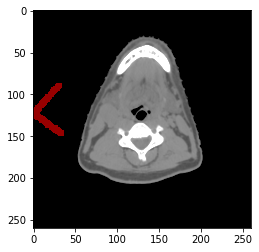

HNSCC Patient 01-0091 index:  1


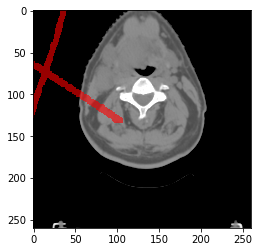

HNSCC Patient 01-0092 index:  2


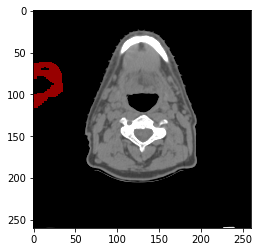

HNSCC Patient 01-0093 index:  3


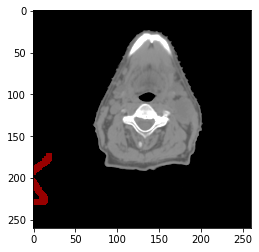

HNSCC Patient 01-0094 index:  4


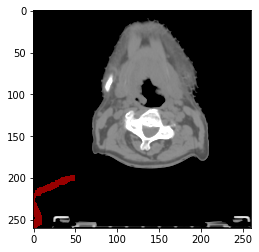

HNSCC Patient 01-0095 index:  5


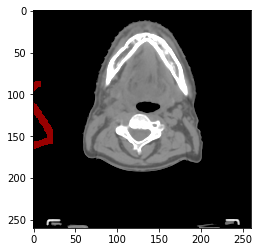

HNSCC Patient 01-0096 index:  6


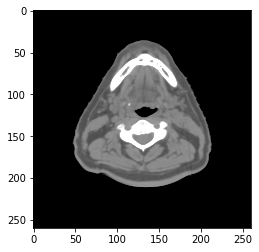

HNSCC Patient 01-0097 index:  7


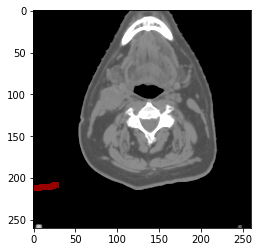

HNSCC Patient 01-0098 index:  8


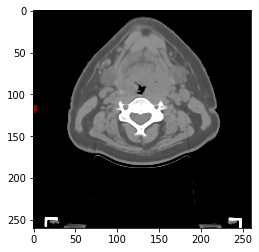

HNSCC Patient 01-0099 index:  9


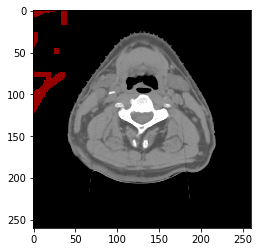

HNSCC Patient 01-00101 index:  10


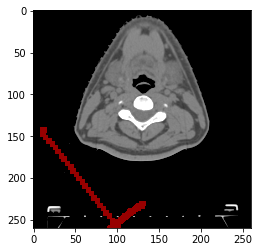

HNSCC Patient 01-00102 index:  11


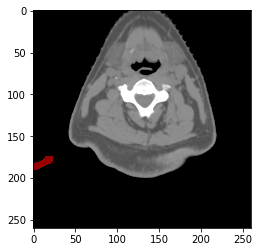

HNSCC Patient 01-00103 index:  12


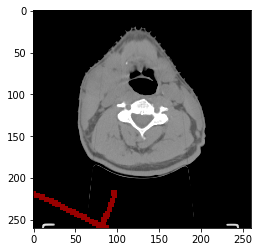

HNSCC Patient 01-00104 index:  13


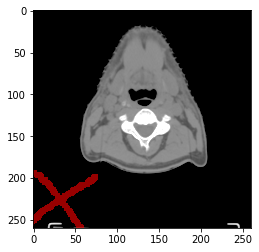

HNSCC Patient 01-00105 index:  14


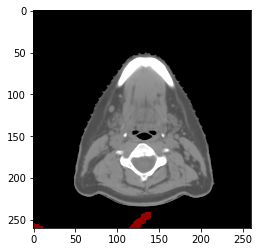

HNSCC Patient 01-00106 index:  15


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


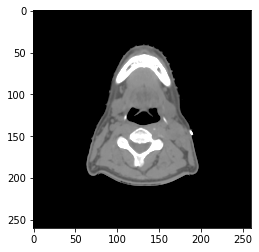

HNSCC Patient 01-00107 index:  16


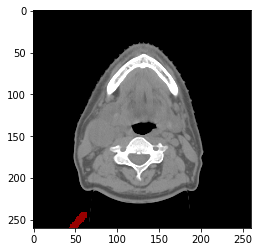

HNSCC Patient 01-00108 index:  17


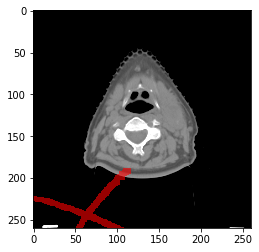

HNSCC Patient 01-00109 index:  18


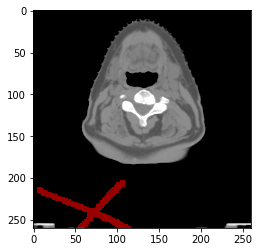

HNSCC Patient 01-00110 index:  19


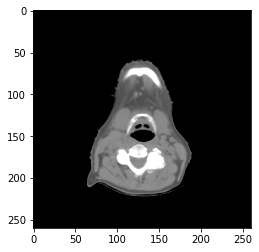

HNSCC Patient 01-00111 index:  20


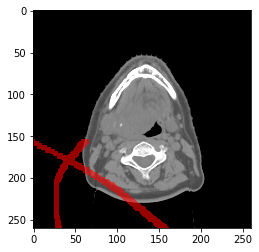

HNSCC Patient 01-00112 index:  21


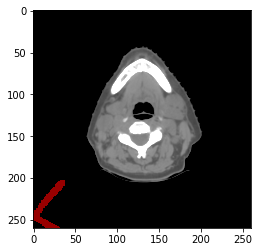

HNSCC Patient 01-00113 index:  22


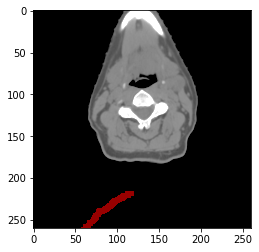

HNSCC Patient 01-00115 index:  23


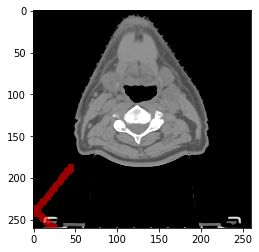

HNSCC Patient 01-00117 index:  24


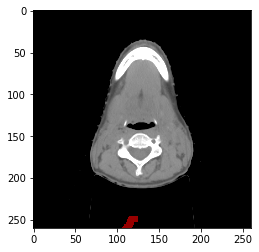

HNSCC Patient 01-00118 index:  25


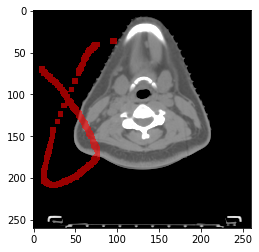

HNSCC Patient 01-00119 index:  26


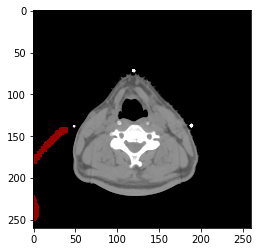

HNSCC Patient 01-00120 index:  27


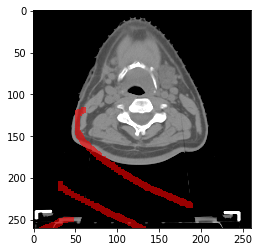

HNSCC Patient 01-00121 index:  28


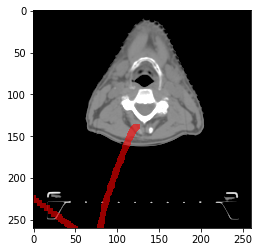

HNSCC Patient 01-00122 index:  29


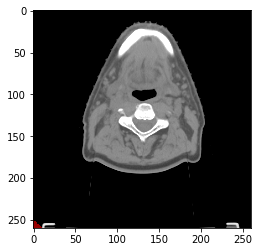

HNSCC Patient 01-00123 index:  30


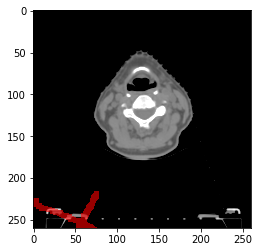

HNSCC Patient 01-00124 index:  31


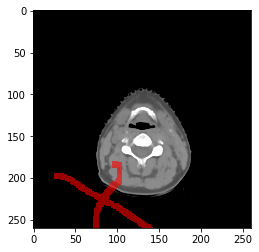

HNSCC Patient 01-00125 index:  32


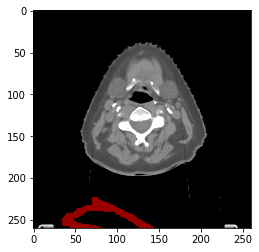

HNSCC Patient 01-00126 index:  33


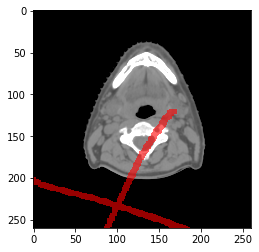

HNSCC Patient 01-00127 index:  34


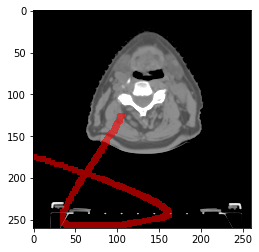

HNSCC Patient 01-00128 index:  35


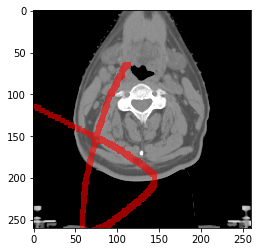

HNSCC Patient 01-00129 index:  36


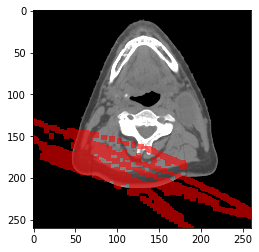

HNSCC Patient 01-00130 index:  37


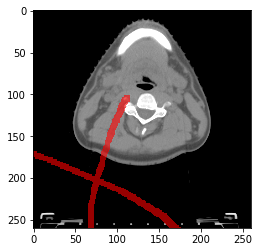

HNSCC Patient 01-00131 index:  38


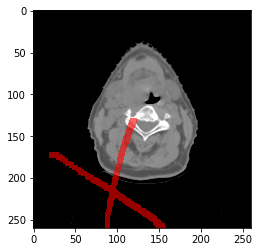

HNSCC Patient 01-00132 index:  39


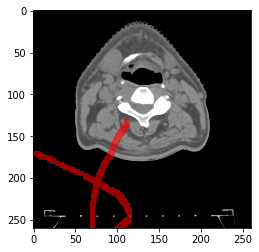

HNSCC Patient 01-00133 index:  40


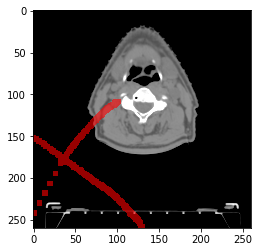

HNSCC Patient 01-00134 index:  41


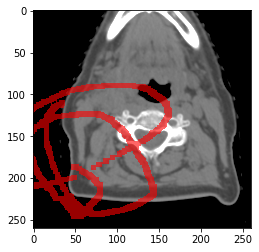

HNSCC Patient 01-00135 index:  42


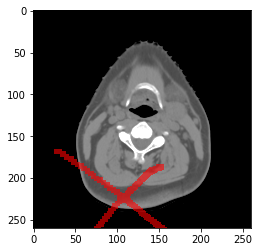

HNSCC Patient 01-00138 index:  43


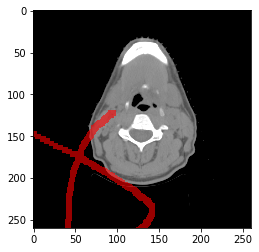

HNSCC Patient 01-00139 index:  44


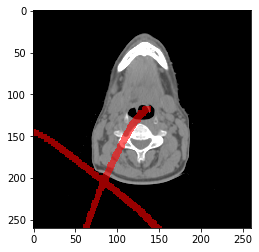

HNSCC Patient 01-00140 index:  45


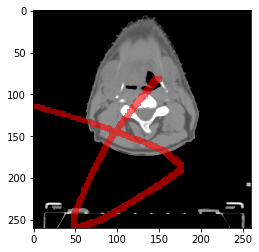

HNSCC Patient 01-00141 index:  46


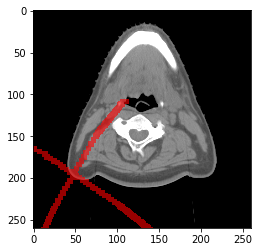

HNSCC Patient 01-00142 index:  47


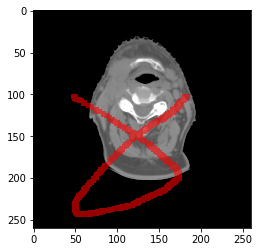

In [ ]:
for i in range(0, len(slices_cropped)):
  PrintTrainingDataLiv(slices_cropped, masks_cropped, id_array, i)

HNSCC Patient 01-0036


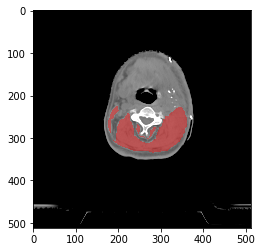

In [ ]:
printTrainingData(36)